
# Evaluation Explorer Notebook

This notebook provides exploratory data analysis (EDA) for the `full_evaluation_results.csv` file.

It includes:
- Dataset overview
- Policy comparison plots
- Time dynamics (defender & attacker)
- Action distributions
- Robustness across replicates

Adjust paths and parameters as needed.


In [14]:

import os
import ast
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

warnings.filterwarnings("ignore", category=FutureWarning)
sns.set(style="whitegrid")

# Path to your CSV file
csv_path = "/home/chris/Desktop/bayesian-security-games/drone_results_V11.csv"


df = pd.read_csv(csv_path)
print(df.shape)
df.head(10)


(360, 21)


,config_file,policy,replicate,seed,avg_comp_time,atk_avg_util,atk_tot_util,def_avg_util,def_tot_util,atk_action_dist,...,joint_action_dist,window_size,window_ids,atk_win_means,def_win_means,adv_win_means,attacker_actions,defender_actions,attacker_utilities,defender_utilities
0,SEED_0_FIXED_A1_FLAT_eps0.00_i0,Boltzmann,0,2656934139,0.010354,0.516810,15.504292,-5.111601,-153.34804,"[0.06666666666666667, 0.1, 0.16666666666666666...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[6, 2, 7, 2, 4, 7, 5, 5, 4, 2, 6, 2, 5, 5, 6, ...","[5, 7, 6, 5, 4, 6, 5, 7, 6, 5, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 3.876072883605957, 0.0, 3...","[-2.4139270782470703, -5.63510799407959, -5.63..."
1,SEED_0_FIXED_A1_FLAT_eps0.00_i0,H2S-H3,0,2847433753,0.033493,0.387607,11.628219,-5.357912,-160.73737,"[0.2, 0.13333333333333333, 0.1, 0.166666666666...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[6, 5, 3, 6, 0, 0, 5, 7, 5, 1, 0, 7, 3, 0, 7, ...","[5, 7, 6, 5, 7, 0, 5, 4, 3, 2, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 3.876072883605957, 3...","[-2.4139270782470703, -5.63510799407959, -5.63..."
2,SEED_0_FIXED_A1_FLAT_eps0.00_i0,AMG,0,1326473008,0.027087,0.516810,15.504292,-5.591246,-167.73737,"[0.13333333333333333, 0.1, 0.1, 0.266666666666...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[6, 4, 3, 3, 3, 3, 2, 1, 5, 7, 3, 2, 0, 4, 1, ...","[5, 7, 6, 5, 7, 0, 5, 4, 3, 2, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.4139270782470703, -5.63510799407959, -5.63..."
3,SEED_0_FIXED_A1_FLAT_eps0.00_i0,ADP,0,73641251,0.141723,0.904417,27.132507,-5.539099,-166.17296,"[0.1, 0.06666666666666667, 0.1, 0.233333333333...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[6, 1, 4, 5, 4, 7, 5, 2, 4, 3, 7, 0, 0, 2, 3, ...","[5, 4, 6, 5, 4, 6, 5, 4, 3, 2, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 3.876072883605957, 3.876072883...","[-2.4139270782470703, -7.41392707824707, -0.63..."
4,SEED_0_FIXED_A1_FLAT_eps0.00_i0,MC,0,3273534468,0.021351,0.000000,0.000000,-4.422123,-132.66368,"[0.1, 0.06666666666666667, 0.1, 0.2, 0.0666666...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[6, 2, 3, 1, 6, 2, 6, 3, 7, 6, 5, 5, 5, 3, 0, ...","[5, 7, 0, 5, 7, 0, 5, 4, 6, 5, 1, 0, 2, 4, 6, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.4139270782470703, -5.63510799407959, -5.19..."
5,SEED_0_FIXED_A1_FLAT_eps0.00_i0,DM,0,3534317018,0.005233,0.775215,23.256435,-5.822123,-174.66370,"[0.1, 0.06666666666666667, 0.26666666666666666...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[6, 0, 1, 3, 3, 0, 2, 4, 2, 5, 7, 6, 2, 2, 2, ...","[5, 7, 0, 5, 7, 0, 5, 4, 6, 5, 1, 0, 2, 4, 6, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 3.876072883605957, 0...","[-2.4139270782470703, -5.63510799407959, -5.19..."
6,SEED_0_FIXED_A1_FLAT_eps0.00_i1,Boltzmann,0,1444828334,0.000435,0.646012,19.380363,-5.383085,-161.49254,"[0.06666666666666667, 0.16666666666666666, 0.0...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[6, 3, 6, 6, 1, 5, 0, 5, 0, 1, 1, 4, 3, 4, 5, ...","[5, 7, 6, 5, 7, 0, 2, 4, 6, 5, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 3.876072883605957, 0.0, 0.0, 0.0, 0...","[-2.4139270782470703, -5.63510799407959, -12.6..."
7,SEED_0_FIXED_A1_FLAT_eps0.00_i1,H2S-H3,0,1150610722,0.000439,0.646012,19.380363,-5.598618,-167.95856,"[0.16666666666666666, 0.13333333333333333, 0.0...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[0, 0, 7, 0, 2, 3, 5, 1, 6, 6, 7, 3, 2, 7, 4, ...","[5, 7, 6, 5, 4, 6, 5, 4, 3, 2, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8760728836059...","[-2.4139270782470703, -5.63510799407959, -5.63..."
8,SEED_0_FIXED_A1_FLAT_eps0.00_i1,AMG,0,655099692,0.000251,0.258405,7.752146,-5.124579,-153.73737,"[0.1, 0.13333333333333333, 0.1, 0.133333333333...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[6, 1, 7, 3, 6, 2, 3, 7, 2, 3, 7, 1, 1, 6, 6, ...","[5, 7, 6, 5, 7, 0, 5, 4, 3, 2, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.4139270782470703, -5.63510799407959, -5.63..."
9,SEED_0_FIXED_A1_FLAT_eps0.00_i1,ADP,0,3663360718,0.100896,0.258405,7.752146,-4.372431,-131.17294,"[0.2, 0.06666666666666667, 0.1, 0.166666666666...",...,NaN,NaN,NaN,NaN,NaN,NaN,"[6, 3, 2, 3, 2, 3, 5, 7, 6, 4, 0, 7, 0, 1

In [ ]:
#Clean up code a bit and parse configs

# --- Parse config_file ---
def parse_config_name(name: str):
    """
    Example: 'ACRL_A1_FLAT_eps0.00_i0'
    → attacker_type='ACRL', n_allowed_attacks=1, prior='FLAT', epsilon=0.00, instance=0
    """
    if pd.isna(name):
        return {"attacker_type": None, "n_allowed_attacks": None, "prior": None, "epsilon": None, "instance": None}

    m = re.match(r"SEED_(\d+)_([A-Za-z]+)_A(\d+)_([A-Za-z]+)_eps([0-9.]+)_i(\d+)", name)
    if m:
        return {
            "model_seed":m.group(1),
            "attacker_type": m.group(2),
            "n_allowed_attacks": int(m.group(3)),
            "prior": m.group(4),
            "epsilon": float(m.group(5)),
            "instance": int(m.group(6)),
        }
    # fallback: partial parse if format differs slightly
    tokens = name.split("_")
    return {
        "attacker_type": tokens[0] if len(tokens) > 0 else None,
        "n_allowed_attacks": int(tokens[1][1:]) if len(tokens) > 1 and tokens[1].startswith("A") else None,
        "prior": tokens[2] if len(tokens) > 2 else None,
        "epsilon": float(tokens[3].replace("eps", "")) if len(tokens) > 3 and "eps" in tokens[3] else None,
        "instance": int(tokens[4].replace("i", "")) if len(tokens) > 4 and tokens[4].startswith("i") else None,
    }

parsed = df["config_file"].apply(parse_config_name)
parsed_df = pd.DataFrame(parsed.tolist())

# --- Merge parsed fields ---
df = pd.concat([df, parsed_df], axis=1)

df = df.dropna(axis=1, how="all")

# Ensure epsilon and prior are treated as categorical for plotting
df["epsilon"] = df["epsilon"].astype(str)
df["prior"] = df["prior"].astype(str)

# Separate data by distince EWA draws
df["model_seed"] = df["model_seed"].astype(str)

df_opponent_0 = df[df["model_seed"] == "0"].copy()
df_opponent_1 = df[df["model_seed"] == "1"].copy()
df_opponent_2 = df[df["model_seed"] == "2"].copy()

In [16]:
#Split dataframes into games with single and two action choices
df["model_seed"] = df["model_seed"].astype(str)


In [17]:
df1 = df[df["model_seed"] == "0"]
df1

,config_file,policy,replicate,seed,avg_comp_time,atk_avg_util,atk_tot_util,def_avg_util,def_tot_util,atk_action_dist,...,attacker_actions,defender_actions,attacker_utilities,defender_utilities,model_seed,attacker_type,n_allowed_attacks,prior,epsilon,instance
0,SEED_0_FIXED_A1_FLAT_eps0.00_i0,Boltzmann,0,2656934139,0.010354,0.516810,15.504292,-5.111601,-153.34804,"[0.06666666666666667, 0.1, 0.16666666666666666...",...,"[6, 2, 7, 2, 4, 7, 5, 5, 4, 2, 6, 2, 5, 5, 6, ...","[5, 7, 6, 5, 4, 6, 5, 7, 6, 5, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 3.876072883605957, 0.0, 3...","[-2.4139270782470703, -5.63510799407959, -5.63...",0,FIXED,1,FLAT,0.0,0
1,SEED_0_FIXED_A1_FLAT_eps0.00_i0,H2S-H3,0,2847433753,0.033493,0.387607,11.628219,-5.357912,-160.73737,"[0.2, 0.13333333333333333, 0.1, 0.166666666666...",...,"[6, 5, 3, 6, 0, 0, 5, 7, 5, 1, 0, 7, 3, 0, 7, ...","[5, 7, 6, 5, 7, 0, 5, 4, 3, 2, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 3.876072883605957, 3...","[-2.4139270782470703, -5.63510799407959, -5.63...",0,FIXED,1,FLAT,0.0,0
2,SEED_0_FIXED_A1_FLAT_eps0.00_i0,AMG,0,1326473008,0.027087,0.516810,15.504292,-5.591246,-167.73737,"[0.13333333333333333, 0.1, 0.1, 0.266666666666...",...,"[6, 4, 3, 3, 3, 3, 2, 1, 5, 7, 3, 2, 0, 4, 1, ...","[5, 7, 6, 5, 7, 0, 5, 4, 3, 2, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.4139270782470703, -5.63510799407959, -5.63...",0,FIXED,1,FLAT,0.0,0
3,SEED_0_FIXED_A1_FLAT_eps0.00_i0,ADP,0,73641251,0.141723,0.904417,27.132507,-5.539099,-166.17296,"[0.1, 0.06666666666666667, 0.1, 0.233333333333...",...,"[6, 1, 4, 5, 4, 7, 5, 2, 4, 3, 7, 0, 0, 2, 3, ...","[5, 4, 6, 5, 4, 6, 5, 4, 3, 2, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 3.876072883605957, 3.876072883...","[-2.4139270782470703, -7.41392707824707, -0.63...",0,FIXED,1,FLAT,0.0,0
4,SEED_0_FIXED_A1_FLAT_eps0.00_i0,MC,0,3273534468,0.021351,0.000000,0.000000,-4.422123,-132.66368,"[0.1, 0.06666666666666667, 0.1, 0.2, 0.0666666...",...,"[6, 2, 3, 1, 6, 2, 6, 3, 7, 6, 5, 5, 5, 3, 0, ...","[5, 7, 0, 5, 7, 0, 5, 4, 6, 5, 1, 0, 2, 4, 6, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.4139270782470703, -5.63510799407959, -5.19...",0,FIXED,1,FLAT,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,SEED_0_FIXED_A1_TIGHT_eps0.60_i9,H2S-H3,0,2994938858,0.000459,0.516810,15.504292,-5.591246,-167.73737,"[0.06666666666666667, 0.06666666666666667, 0.0...",...,"[6, 7, 5, 2, 0, 5, 1, 1, 4, 4, 6, 2, 3, 4, 4, ...","[5, 7, 6, 5, 7, 0, 5, 4, 3, 2, 1, 0, 2, 4, 0, ...","[0.0, 3.876072883605957, 0.0, 0.0, 0.0, 0.0, 0...","[-2.4139270782470703, -12.63510799407959, -5.6...",0,FIXED,1,TIGHT,0.6,9
356,SEED_0_FIXED_A1_TIGHT_eps0.60_i9,AMG,0,355204414,0.000274,0.387607,11.628219,-5.357912,-160.73737,"[0.2, 0.16666666666666666, 0.26666666666666666...",...,"[6, 4, 2, 5, 0, 7, 1, 1, 2, 0, 7, 2, 0, 2, 3, ...","[5, 7, 6, 5, 7, 0, 5, 4, 3, 2, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 3.876072883605957, 0.0, 0.0, 0...","[-2.4139270782470703, -5.63510799407959, -5.63...",0,FIXED,1,TIGHT,0.6,9
357,SEED_0_FIXED_A1_TIGHT_eps0.60_i9,ADP,0,54101127,0.115789,0.646012,19.380363,-5.072432,-152.17296,"[0.06666666666666667, 0.1, 0.1, 0.166666666666...",...,"[6, 4, 6, 2, 6, 0, 7, 4, 4, 5, 1, 2, 3, 3, 6, ...","[5, 4, 6, 5, 4, 6, 5, 4, 3, 2, 1, 0, 2, 4, 0, ...","[0.0, 3.876072883605957, 3.876072883605957, 0....","[-2.4139270782470703, -14.41392707824707, -7.6...",0,FIXED,1,TIGHT,0.6,9
358,SEED_0_FIXED_A1_TIGHT_eps0.60_i9,MC,0,991426624,0.007729,0.775215,23.256435,-5.822123,-174.66370,"[0.23333333333333334, 0.1, 0.1, 0.033333333333...",...,"[6, 7, 7, 6, 1, 5, 0, 4, 0, 1, 7, 3, 2, 7, 7, ...","[5, 7, 0, 5, 7, 0, 5, 4, 6, 5, 1, 0, 2, 4, 6, ...","[0.0, 3.876072883605957, 0.0, 0.0, 0.0, 0.0, 0...","[-2.4139270782470703, -12.63510799407959, -5.1...",0,FIXED,1,TIGHT,0.6,9


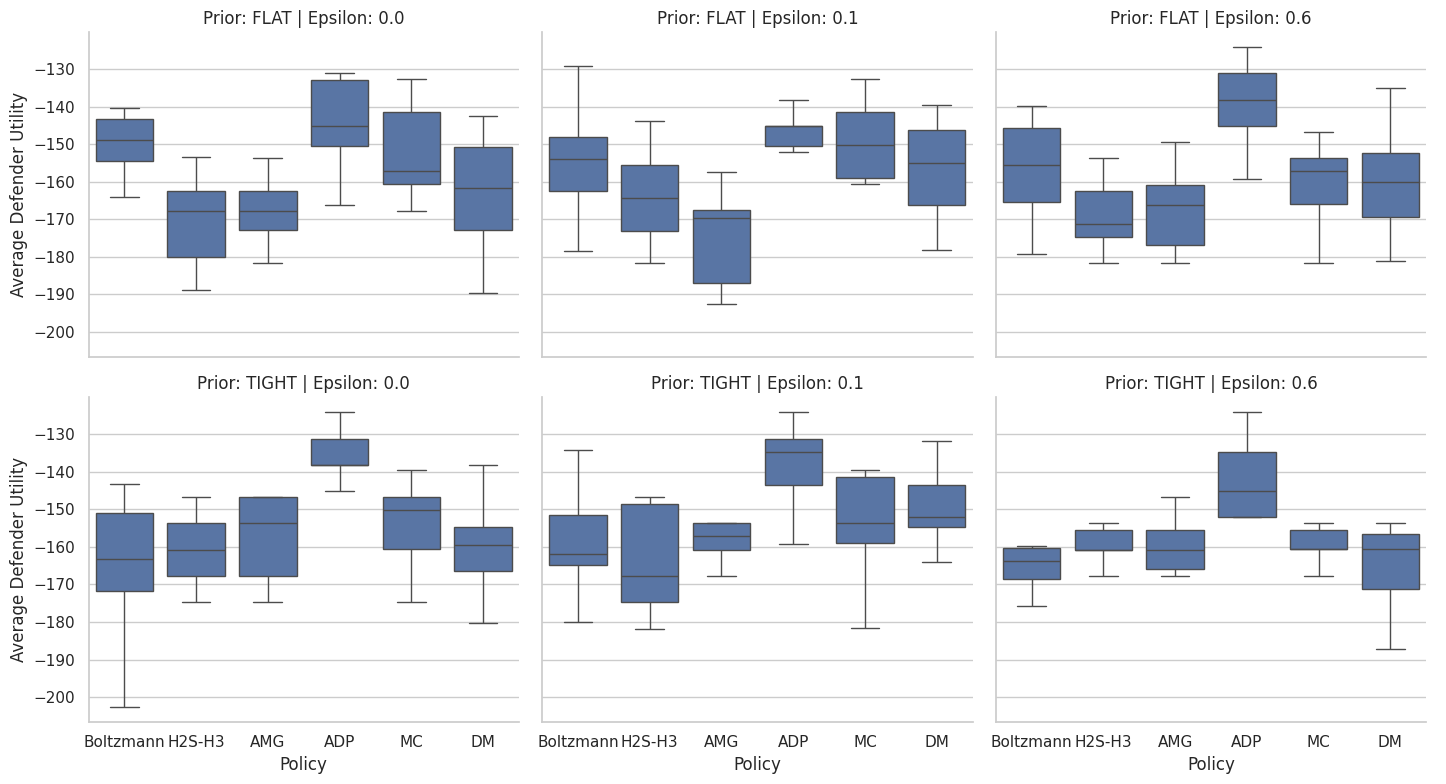

In [18]:

df = df_opponent_0
#df = df_OG

# Create a FacetGrid: columns by epsilon, rows by prior
g = sns.catplot(
    data=df,
    x="policy",
    y="def_tot_util",
    col="epsilon",
    row="prior",
    kind="box",
    sharey=True,
    showfliers=False,
    height=4,
    aspect=1.2
)

g.set_axis_labels("Policy", "Average Defender Utility")
g.set_titles(row_template="Prior: {row_name}", col_template="Epsilon: {col_name}")
plt.tight_layout()
plt.show()



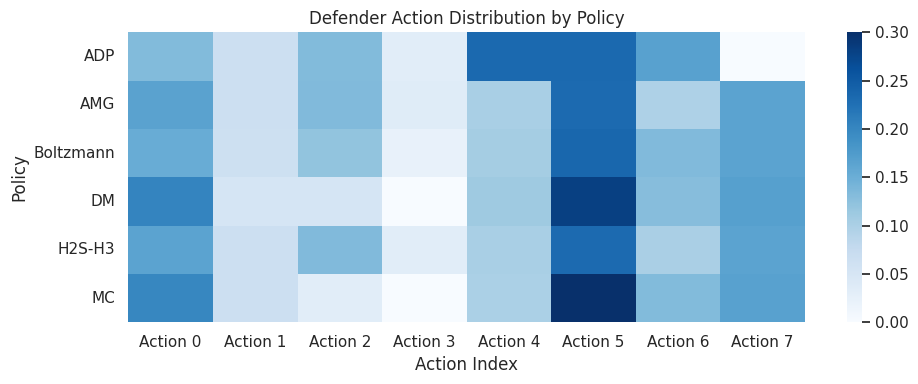

In [19]:
df = df_opponent_0

def safe_parse_array(x):
    if isinstance(x, str):
        try:
            return np.array(ast.literal_eval(x))
        except (ValueError, SyntaxError):
            return np.nan  # or leave it as-is if you prefer
    elif isinstance(x, (list, np.ndarray)):
        return np.array(x)
    else:
        return np.nan

df["def_action_dist"] = df["def_action_dist"].apply(safe_parse_array)
df["atk_action_dist"] = df["atk_action_dist"].apply(safe_parse_array)

# Compute mean distributions across replicates per policy
atk_means = df.groupby("policy")["atk_action_dist"].apply(lambda x: np.mean(np.stack(x.values), axis=0))
def_means = df.groupby("policy")["def_action_dist"].apply(lambda x: np.mean(np.stack(x.values), axis=0))

# Plot defender heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(np.vstack(def_means.values), cmap="Blues", annot=False,
            xticklabels=[f"Action {i}" for i in range(len(def_means.iloc[0]))],
            yticklabels=def_means.index)
plt.title("Defender Action Distribution by Policy")
plt.xlabel("Action Index")
plt.ylabel("Policy")
plt.tight_layout()
plt.show()

In [ ]:
#Break apart the utility records so we can plot over time



df_opponent_0["defender_utilities"] = df_opponent_0["defender_utilities"].apply(parse_list)

print(type(df_opponent_0["defender_utilities"].iloc[0]))


df_long = df_opponent_0.explode("defender_utilities").reset_index(drop=True)

df_long["timestep"] = df_long.groupby(["config_file","policy", "replicate"]).cumcount()

df_long.rename(columns={"defender_utilities": "def_util"}, inplace=True)


df_opponent_0_exploded = df_long



<class 'list'>


In [21]:
df_opponent_0_exploded.head(5)

,config_file,policy,replicate,seed,avg_comp_time,atk_avg_util,atk_tot_util,def_avg_util,def_tot_util,atk_action_dist,...,defender_actions,attacker_utilities,def_util,model_seed,attacker_type,n_allowed_attacks,prior,epsilon,instance,timestep
0,SEED_0_FIXED_A1_FLAT_eps0.00_i0,Boltzmann,0,2656934139,0.010354,0.51681,15.504292,-5.111601,-153.34804,"[0.06666666666666667, 0.1, 0.16666666666666666...",...,"[5, 7, 6, 5, 4, 6, 5, 7, 6, 5, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 3.876072883605957, 0.0, 3...",-2.413927,0,FIXED,1,FLAT,0.0,0,0
1,SEED_0_FIXED_A1_FLAT_eps0.00_i0,Boltzmann,0,2656934139,0.010354,0.51681,15.504292,-5.111601,-153.34804,"[0.06666666666666667, 0.1, 0.16666666666666666...",...,"[5, 7, 6, 5, 4, 6, 5, 7, 6, 5, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 3.876072883605957, 0.0, 3...",-5.635108,0,FIXED,1,FLAT,0.0,0,1
2,SEED_0_FIXED_A1_FLAT_eps0.00_i0,Boltzmann,0,2656934139,0.010354,0.51681,15.504292,-5.111601,-153.34804,"[0.06666666666666667, 0.1, 0.16666666666666666...",...,"[5, 7, 6, 5, 4, 6, 5, 7, 6, 5, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 3.876072883605957, 0.0, 3...",-5.635108,0,FIXED,1,FLAT,0.0,0,2
3,SEED_0_FIXED_A1_FLAT_eps0.00_i0,Boltzmann,0,2656934139,0.010354,0.51681,15.504292,-5.111601,-153.34804,"[0.06666666666666667, 0.1, 0.16666666666666666...",...,"[5, 7, 6, 5, 4, 6, 5, 7, 6, 5, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 3.876072883605957, 0.0, 3...",-0.635108,0,FIXED,1,FLAT,0.0,0,3
4,SEED_0_FIXED_A1_FLAT_eps0.00_i0,Boltzmann,0,2656934139,0.010354,0.51681,15.504292,-5.111601,-153.34804,"[0.06666666666666667, 0.1, 0.16666666666666666...",...,"[5, 7, 6, 5, 4, 6, 5, 7, 6, 5, 1, 0, 2, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 3.876072883605957, 0.0, 3...",-12.635108,0,FIXED,1,FLAT,0.0,0,4


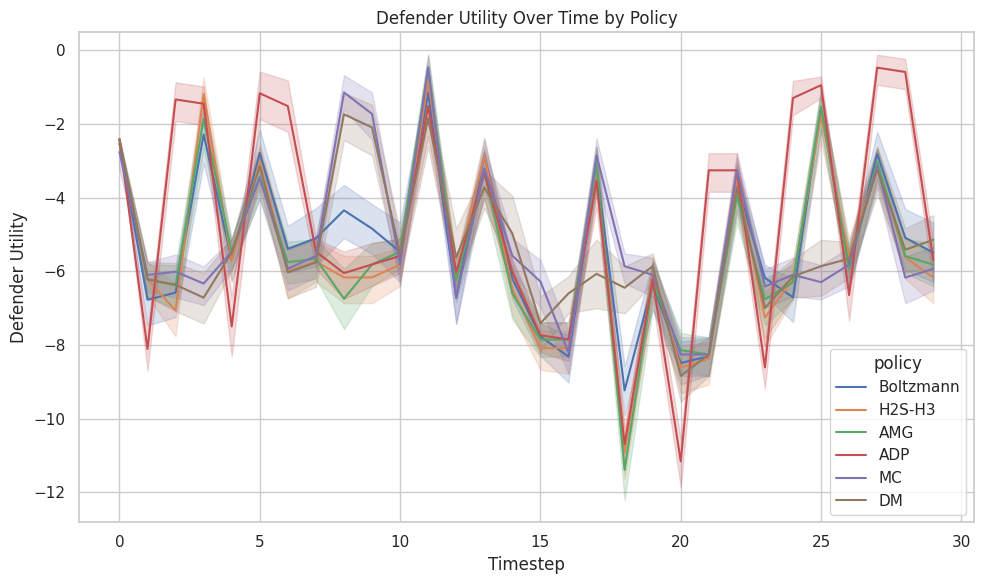

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_long,
    x="timestep",
    y="def_util",
    hue="policy",
    errorbar=("ci", 95)
)
plt.title("Defender Utility Over Time by Policy")
plt.xlabel("Timestep")
plt.ylabel("Defender Utility")
plt.tight_layout()
plt.show()


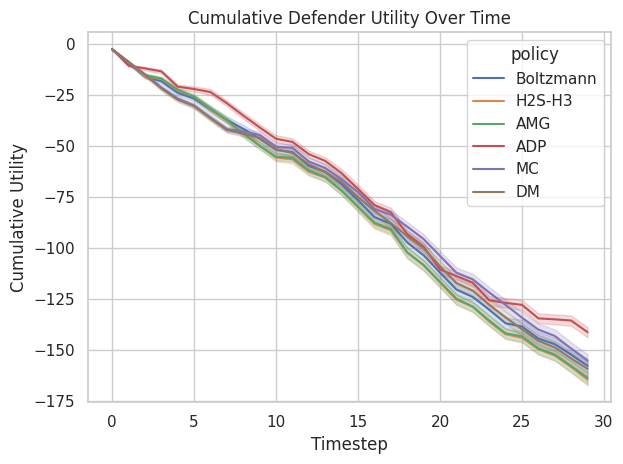

In [23]:
df_long["def_util"] = df_long["def_util"].astype(float)
df_long["cum_def_util"] = (
    df_long.groupby(["policy", "config_file", "replicate"])["def_util"].cumsum()
)

sns.lineplot(
    data=df_long, x="timestep", y="cum_def_util", hue="policy", errorbar=("ci", 95)
)
plt.title("Cumulative Defender Utility Over Time")
plt.xlabel("Timestep")
plt.ylabel("Cumulative Utility")
plt.tight_layout()
plt.show()


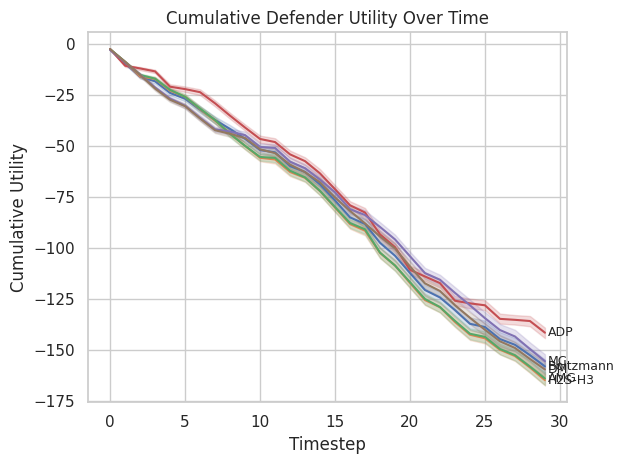

In [24]:

# Convert and compute cumulative utility
df_long["def_util"] = df_long["def_util"].astype(float)
df_long["cum_def_util"] = (
    df_long.groupby(["policy", "config_file", "replicate"])["def_util"].cumsum()
)

# Plot as usual
sns.lineplot(
    data=df_long, x="timestep", y="cum_def_util", hue="policy", errorbar=("ci", 95)
)

# Remove the legend box
plt.legend([], [], frameon=False)

# Add labels at the end of each line
for policy, grouped_df in df_long.groupby("policy"):
    # Get the last timestep for that policy (mean due to multiple replicates)
    last_point = (
        grouped_df.groupby("timestep")["cum_def_util"]
        .mean()
        .reset_index()
        .iloc[-1]
    )
    x = last_point["timestep"]
    y = last_point["cum_def_util"]

    plt.text(
        x + 0.2,  # small shift to the right
        y,
        policy,
        fontsize=9,
        verticalalignment="center"
    )

plt.title("Cumulative Defender Utility Over Time")
plt.xlabel("Timestep")
plt.ylabel("Cumulative Utility")
plt.tight_layout()
plt.show()

In [25]:
import matplotlib.ticker as ticker

# Get unique timesteps and sites
timesteps = sorted(df["t"].unique())
sites = sorted(df["site"].unique())
T, S = len(timesteps), len(sites)

# Build defense matrix: default 1 (defended = blue), set undefended sites to 0 (white)
defense_matrix = np.ones((T, S))
for _, row in df[df["role"] == "Defense"].iterrows():
    t_idx = timesteps.index(int(row["t"]))
    s_idx = sites.index(int(row["site"]))
    defense_matrix[t_idx, s_idx] = 0

plt.figure(figsize=(12, 6))

plt.imshow(
    defense_matrix.T,
    cmap="Blues",
    alpha=0.6,
    aspect="auto",
    origin="lower",
    extent=[0, T, min(sites), max(sites)+1]
)

plt.scatter(attacks["t"] + 0.5, attacks["site"] + 0.5,
            c="red", marker="x", s=60, label="Attack")

plt.xlabel("Timestep")
plt.ylabel("Site")
plt.title("Attacks vs Defensive Gaps Over Time")

# Y ticks shifted by +0.5 so they are centered in each row
plt.yticks(np.arange(1, 11), labels=range(1, 11))

# X grid every step, but label only every 10
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))   # label every 10
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))    # grid every step

plt.grid(which="major", axis="both", color="gray", linestyle="--", linewidth=0.5)
plt.grid(which="minor", axis="x", color="lightgray", linestyle="--", linewidth=0.3)

# Legend outside
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),
    ncol=1,
    frameon=False
)

plt.show()


KeyError: 't'

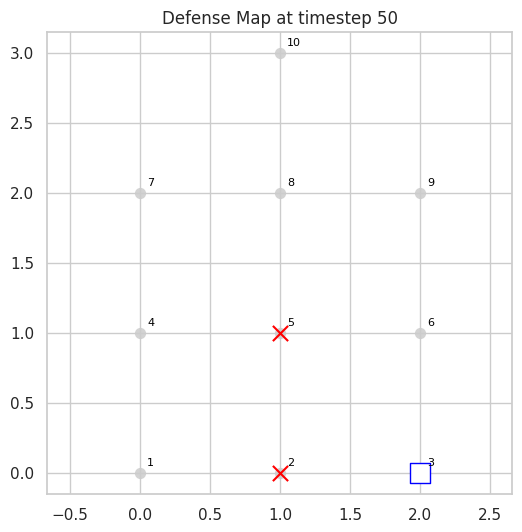

In [ ]:
site_coords = {
    1: (0, 0),
    2: (1, 0),
    3: (2, 0),
    4: (0, 1),
    5: (1, 1),
    6: (2, 1),
    7: (0, 2),
    8: (1, 2),
    9: (2, 2),
    10: (1, 3),
}

def plot_defense_map(df, t, site_coords):
    step = df[df["t"] == t]

    plt.figure(figsize=(6, 6))

    # Plot defended sites in blue, undefended site in white, attacks in red
    for _, row in step.iterrows():
        x, y = site_coords[int(row["site"])]
        if row["role"] == "Defense":
            plt.scatter(x, y, c="white", edgecolor="blue", s=200, marker="s", label="Undefended" if "Undefended" not in step["role"].values else "")
        elif row["role"] == "Attack":
            plt.scatter(x, y, c="red", marker="x", s=120, label="Attack")

    # Plot all site positions (light gray background for reference)
    for sid, (x, y) in site_coords.items():
        plt.scatter(x, y, c="lightgray", s=50, zorder=0)
        plt.text(x+0.05, y+0.05, str(sid), fontsize=8, color="black")

    plt.title(f"Defense Map at timestep {t}")
    plt.axis("equal")
    plt.show()

plot_defense_map(df, 50, site_coords)



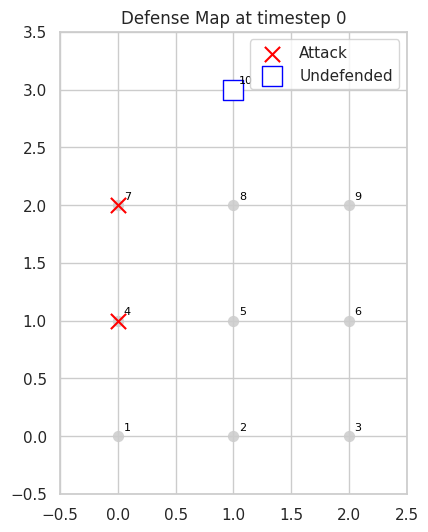

MovieWriter ffmpeg unavailable; using Pillow instead.


Animation saved to game.gif


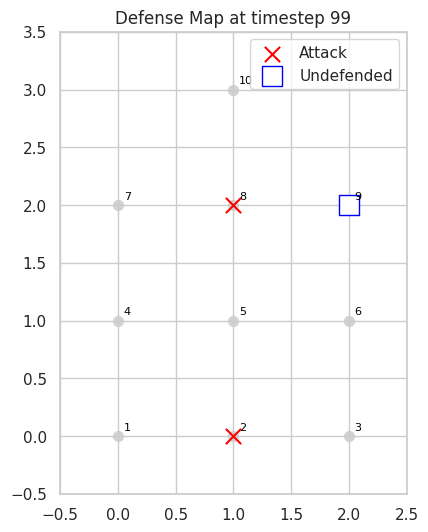

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def animate_defense_map(df, site_coords, interval=800, save_path=None):
    timesteps = sorted(df["t"].unique())

    fig, ax = plt.subplots(figsize=(6, 6))

    # Draw static background (all sites in gray)
    for sid, (x, y) in site_coords.items():
        ax.scatter(x, y, c="lightgray", s=50, zorder=0)
        ax.text(x+0.05, y+0.05, str(sid), fontsize=8, color="black")

    scat_attack = ax.scatter([], [], c="red", marker="x", s=120, label="Attack")
    scat_def = ax.scatter([], [], c="white", edgecolor="blue", marker="s", s=200, label="Undefended")

    ax.set_title("Defense Map")
    ax.set_xlim(-0.5, max(x for x, _ in site_coords.values()) + 0.5)
    ax.set_ylim(-0.5, max(y for _, y in site_coords.values()) + 0.5)
    ax.set_aspect("equal")
    ax.legend(loc="upper right")

    def update(frame):
        t = timesteps[frame]
        step = df[df["t"] == t]

        # Separate sites by role
        atk_sites = [site_coords[int(s)] for s in step[step["role"] == "Attack"]["site"]]
        def_sites = [site_coords[int(s)] for s in step[step["role"] == "Defense"]["site"]]

        if atk_sites:
            scat_attack.set_offsets(atk_sites)
        else:
            scat_attack.set_offsets([])

        if def_sites:
            scat_def.set_offsets(def_sites)
        else:
            scat_def.set_offsets([])

        ax.set_title(f"Defense Map at timestep {t}")
        return scat_attack, scat_def

    ani = animation.FuncAnimation(
        fig, update, frames=len(timesteps), interval=interval, blit=True, repeat=False
    )

    if save_path:
        ani.save(save_path, writer="ffmpeg", dpi=150)
        print(f"Animation saved to {save_path}")
    else:
        plt.show()

animate_defense_map(df, site_coords)              # show live
animate_defense_map(df, site_coords, save_path="game.gif")  # save as video

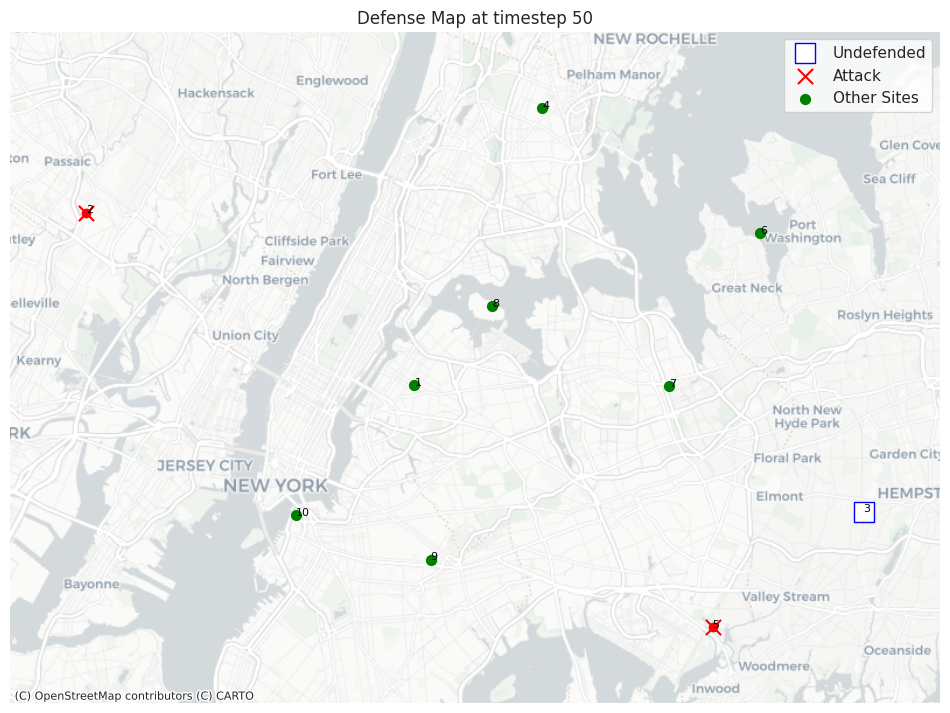

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

# Example: replace with actual site lat/lon (NYC area)
site_coords = {
    1: (-73.92473, 40.757490),  # Astoria
    2: (-74.117797, 40.8343637),  # Rutherford
    3: (-73.660261, 40.701116),  # West Hempstead
    4: (-73.849618, 40.88101),  # East Bronx
    5: (-73.749213, 40.649716),  # JFK
    6: (-73.721110, 40.825360),  # Manhasset Bay
    7: (-73.774628, 40.7568889),  # Bayside
    8: (-73.878915, 40.7926903),  #Riker's Island
    9: (-73.915209, 40.679680),  # Brooklyn
    10: (-73.994368, 40.699360), # Ft.Green Park
}

t=50
step = df[df["t"] == t]

# Build a GeoDataFrame of sites
records = []
for sid, (lon, lat) in site_coords.items():
    role = step.loc[step["site"] == sid, "role"].iloc[0] if sid in step["site"].values else None
    records.append({"site": sid, "role": role, "geometry": Point(lon, lat)})

gdf = gpd.GeoDataFrame(records, crs="EPSG:4326").to_crs(epsg=3857)  # web mercator for tiles

    # Make sure gdf is in Web Mercator
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color="red")

# Add a Carto basemap (stable in new versions)
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron)

# Plot undefended
gdf[gdf["role"] == "Defense"].plot(ax=ax, marker="s", facecolor="white", edgecolor="blue", markersize=200, label="Undefended")
# Plot attacks
gdf[gdf["role"] == "Attack"].plot(ax=ax, marker="x", color="red", markersize=120, label="Attack")
# Plot neutral
gdf[gdf["role"].isna()].plot(ax=ax, color="green", markersize=50, label="Other Sites")

for _, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    ax.text(x, y, str(row["site"]), fontsize=8, color="black")

ax.set_axis_off()
ax.margins(0)
ax.set_title(f"Defense Map at timestep {t}")
ax.legend()
# expand bounds so you see full city, not just points
xmin, ymin, xmax, ymax = gdf.total_bounds
ax.set_xlim(xmin - 5000, xmax + 5000)
ax.set_ylim(ymin - 5000, ymax + 5000)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

# Example: replace with actual site lat/lon (NYC area)
site_coords = {
    1: (-73.92473, 40.757490),  # Astoria
    2: (-74.117797, 40.8343637),  # Rutherford
    3: (-73.660261, 40.701116),  # West Hempstead
    4: (-73.849618, 40.88101),  # East Bronx
    5: (-73.749213, 40.649716),  # JFK
    6: (-73.721110, 40.825360),  # Manhasset Bay
    7: (-73.774628, 40.7568889),  # Bayside
    8: (-73.878915, 40.7926903),  #Riker's Island
    9: (-73.915209, 40.679680),  # Brooklyn
    10: (-73.994368, 40.699360), # Ft.Green Park
}

t=50
step = df[df["t"] == t]

# Build a GeoDataFrame of sites
records = []
for sid, (lon, lat) in site_coords.items():
    role = step.loc[step["site"] == sid, "role"].iloc[0] if sid in step["site"].values else None
    records.append({"site": sid, "role": role, "geometry": Point(lon, lat)})

gdf = gpd.GeoDataFrame(records, crs="EPSG:4326").to_crs(epsg=3857)  # web mercator for tiles

    # Make sure gdf is in Web Mercator
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color="red")

# Add a Carto basemap (stable in new versions)
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron)

# Plot undefended
gdf[gdf["role"] == "Defense"].plot(ax=ax, marker="s", facecolor="white", edgecolor="blue", markersize=200, label="Undefended")
# Plot attacks
gdf[gdf["role"] == "Attack"].plot(ax=ax, marker="x", color="red", markersize=120, label="Attack")
# Plot neutral
gdf[gdf["role"].isna()].plot(ax=ax, color="green", markersize=50, label="Other Sites")

for _, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    ax.text(x, y, str(row["site"]), fontsize=8, color="black")

ax.set_axis_off()
ax.margins(0)
ax.set_title(f"Defense Map at timestep {t}")
ax.legend()
# expand bounds so you see full city, not just points
xmin, ymin, xmax, ymax = gdf.total_bounds
ax.set_xlim(xmin - 5000, xmax + 5000)
ax.set_ylim(ymin - 5000, ymax + 5000)
plt.show()

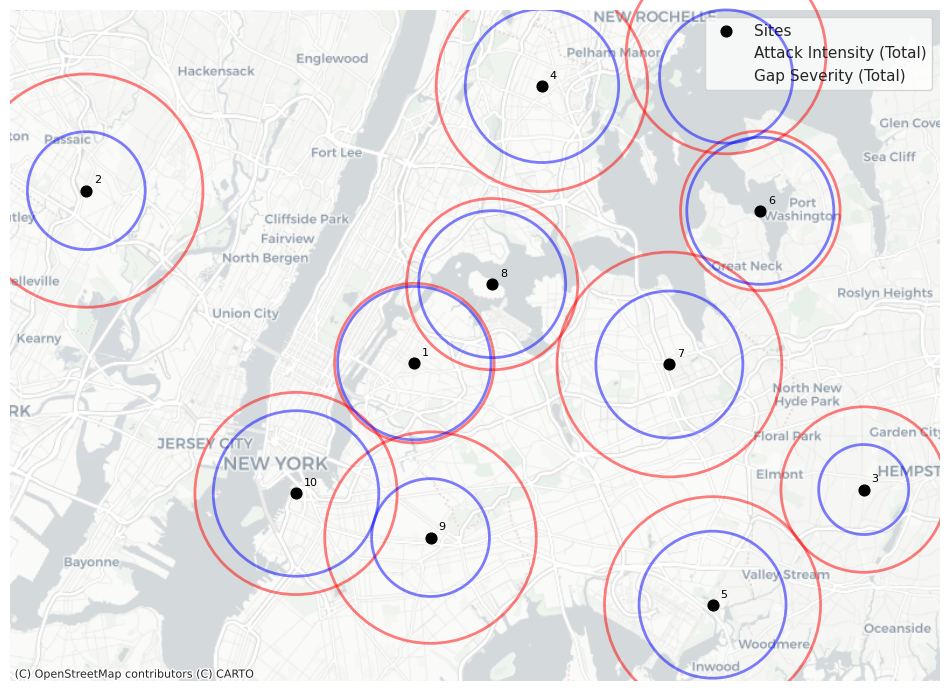

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

t = 50
step = df[df["t"] == t]

# --- Build GeoDataFrame of sites at this timestep ---
records = []
for sid, (lon, lat) in site_coords.items():
    role = step.loc[step["site"] == sid, "role"].iloc[0] if sid in step["site"].values else None
    records.append({"site": sid, "role": role, "geometry": Point(lon, lat)})

gdf = gpd.GeoDataFrame(records, crs="EPSG:4326").to_crs(epsg=3857)

# --- Count ALL attacks across dataset (all timesteps) ---
total_attack_counts = df[df["role"] == "Attack"].groupby("site").size()
gdf["attack_count"] = gdf["site"].map(total_attack_counts).fillna(0)

# --- Count ALL undefenses across dataset (all timesteps) ---
total_attack_counts = df[df["role"] == "Defense"].groupby("site").size()
gdf["gap_count"] = gdf["site"].map(total_attack_counts).fillna(0)

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 12))

# Baseline: all sites shown equally
gdf.plot(ax=ax, color="black", markersize=60, zorder=3, label="Sites")

# Attack-intensity circles
circle_sizes = gdf["attack_count"] * 1000 + 200
gdf.plot(
    ax=ax,
    markersize=circle_sizes,
    marker="o",
    facecolor="none",
    edgecolor="red",
    linewidth=2,
    alpha=0.5,
    zorder=4,
    label="Attack Intensity (Total)"
)

# Gap-intensity circles
circle_sizes = gdf["gap_count"] * 1000 + 200
gdf.plot(
    ax=ax,
    markersize=circle_sizes,
    marker="o",
    facecolor="none",
    edgecolor="blue",
    linewidth=2,
    alpha=0.5,
    zorder=4,
    label="Gap Severity (Total)"
)

# Labels
for _, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    ax.text(x+500, y+500, str(row["site"]), fontsize=8, color="black")

# Basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron)

# Clean look
ax.set_axis_off()
ax.margins(0)
ax.legend()

# Expand bounds
xmin, ymin, xmax, ymax = gdf.total_bounds
ax.set_xlim(xmin - 5000, xmax + 5000)
ax.set_ylim(ymin - 5000, ymax + 5000)

plt.show()
